In [4]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
data = pd.read_csv('HR_comma_sep.csv')
data.head(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [8]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

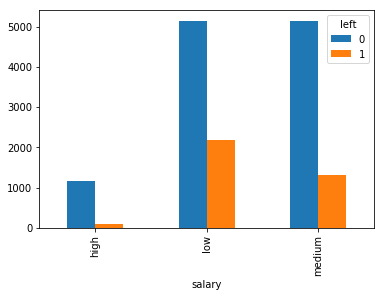

In [9]:
pd.crosstab(data.salary, data.left).plot(kind = 'bar')
plt.show()

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317
left
0    11428
1     3571
dtype: int64


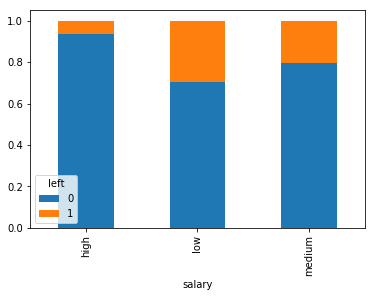

In [10]:
q = pd.crosstab(data.salary, data.left)
print(q)
print(q.sum())
q.div(q.sum(1),  axis = 0).plot(kind = 'bar', stacked = True)
plt.show()

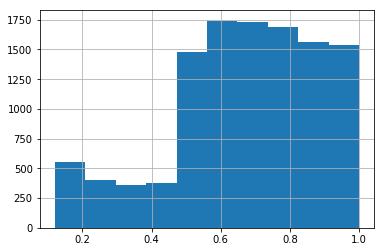

In [11]:
data[data.left == 0].satisfaction_level.hist()
plt.show()

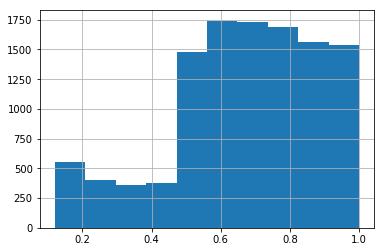

In [12]:
data[data.left == 0].satisfaction_level.hist()
plt.show()

In [13]:
model = LogisticRegression()

y, X = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary)', data, return_type='dataframe')
X = X.rename(columns = {
    'C(sales)[T.RandD]': 'Department: Random',
    'C(sales)[T.accounting]': 'Department: Accounting',
    'C(sales)[T.hr]': 'Department: HR',
    'C(sales)[T.management]': 'Department: Management',
    'C(sales)[T.marketing]': 'Department: Marketing',
    'C(sales)[T.product_mng]': 'Department: Product_Management',
    'C(sales)[T.sales]': 'Department: Sales',
    'C(sales)[T.support]': 'Department: Support',
    'C(sales)[T.technical]': 'Department: Technical',
    'C(salary)[T.low]': 'Salary: Low',
    'C(salary)[T.medium]': 'Salary: Medium'}) 
y = np.ravel(y)

In [15]:
X.head(2)

,Intercept,Department: Random,Department: Accounting,Department: HR,Department: Management,Department: Marketing,Department: Product_Management,Department: Sales,Department: Support,Department: Technical,Salary: Low,Salary: Medium,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0


In [16]:
model.fit(X, y)
pd.DataFrame(list(zip(X.columns, np.transpose(model.coef_))))

/Users/s0j01j7/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0,1
0,Intercept,[-0.7241218096910765]
1,Department: Random,[-0.46465335430137933]
2,Department: Accounting,[0.11480746952713887]
3,Department: HR,[0.3447024968621663]
4,Department: Management,[-0.36197691611498206]
5,Department: Marketing,[0.09425427209203613]
6,Department: Product_Management,[-0.0380803172162474]
7,Department: Sales,[0.06953539028957977]
8,Department: Support,[0.15060969276630456]
9,Department: Technical,[0.17367703432673265]


In [17]:
print(model.score(X, y))

0.7919194612974199


In [18]:
#salary = high, satisfaction_level = 0.5, last_evaluation = 0.7, number_project = 4, averg_monthly_hour = 160,
#time_spend_company = 3, promotion_last_5years = no, work_accident = 0
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

array([[0.9157868, 0.0842132]])

In [19]:
pred = model.predict(X)
(abs(pred-y)).sum() / len(y)

0.20808053870258017